<h1>Time Series Querying (I)</h1>

Here we are going to import a new class from `emspy.query` called `TSeriesQuery`.

In [25]:
import emspy
from emspy import Connection
from emspy.query import FltQuery
from emspy.query import TSeriesQuery

Import getpass for handling passwords. 

In [26]:
import getpass

Set up credentials. 

In [27]:
#-- Original --#
# efoqa_user = input('Enter Username:')
# efoqa_pass = getpass.getpass('Enter Password:')
#--------------#

efoqa_user = 'jeffrey.okogbaa'
efoqa_pass = 'Footballsd8973!'

Define a system.

In [28]:
server_url = 'https://oae-api.us.efoqa.com/api'

Create a connection.  Uncomment the connection type that works for you. 

In [29]:
#connection without proxy
c = Connection(user=efoqa_user, pwd=efoqa_pass, server_url=server_url)

Define a flight record to use for a later flight query.  

<b>Note:</b> I'm not going to go through the exercise here, but there are obviously ways you can retrieve flight records numbers using `FltQuery` queries.  Then you can pass these flight record numbers into a `TSeriesQuery` query to obtain time series data. 

In [30]:
fr = 235488

Create a `TSeriesQuery` object.  Tell it that we want to use the `connection` object called c, and we want to connect to ems24-app.  Save metadata in the file specified by the data_file argument string. 

In [31]:
tsq = TSeriesQuery(c, 1, data_file='tsData.db')

<h3>Add Parameters</h3>

Specify the parameters you want to search for.  `tsq.select()` will take as many parameters as you give it.  

<b>Note:</b> emsPy does not do anything with interpolation mode.  That means by default, you get `NaN` in return for values that are between samples. 

In [32]:
tsq.select("Pressure Altitude", "airspeed (calibrated; 1 or only)", "ground speed (best avail)")

Alternate way to select parameters using list unpacking (this does the same thing as the cell above). 

<h3>Simple Query</h3>

Run a time series query with the supplied flight record number. 

If start and end timepoints are not specified, this will retrieve the entire flight record. 

In [33]:
res_dat = tsq.run(fr)

In [34]:
res_dat.head(10)

,Time (sec),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots)
0,0.0,80.0,0.0,2.0
1,1.0,80.0,0.0,0.0
2,2.0,80.0,0.0,0.0
3,3.0,80.0,0.0,0.0
4,4.0,79.0,0.0,2.0
5,5.0,80.0,0.0,2.0
6,6.0,80.0,0.0,2.0
7,7.0,80.0,0.0,2.0
8,8.0,80.0,0.0,2.0
9,9.0,80.0,0.0,2.0


<h3>Query with Start and End Specified</h3>

Reset the time series query.  This removes the analytic ID's that were found earlier, as well as the queryset (the JSON text that is sent with the query). 

In [35]:
tsq.reset()
tsq.select("Pressure Altitude", "airspeed (calibrated; 1 or only)", "ground speed (best avail)")

In [36]:
res_dat = tsq.run(fr, start=0, end=5)

In [37]:
res_dat

,Time (sec),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots)
0,0.0,80.0,0.0,2.0
1,1.0,80.0,0.0,0.0
2,2.0,80.0,0.0,0.0
3,3.0,80.0,0.0,0.0
4,4.0,79.0,0.0,2.0
5,5.0,80.0,0.0,2.0


You can see that only samples between `start` and `end` are returned. 

In [38]:
tsq.reset()

Same as above, but with a quickly sampled parameter included.

In [39]:
tsq.select("Pressure Altitude", "airspeed (calibrated; 1 or only)", "ground speed (best avail)", "Acceleration (normal load-factor)")

In [40]:
res_dat = tsq.run(fr, start=0, end=5)

In [41]:
res_dat

,Time (sec),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots),Acceleration (normal load-factor) (g's)
0,0.000,80.0,0.0,2.0,0.967233
1,0.125,NaN,NaN,NaN,0.967233
2,0.250,NaN,NaN,NaN,0.967233
3,0.375,NaN,NaN,NaN,0.967233
4,0.500,NaN,NaN,NaN,0.967233
5,0.625,NaN,NaN,NaN,0.967233
6,0.750,NaN,NaN,NaN,0.967233
7,0.875,NaN,NaN,NaN,0.967233
8,1.000,80.0,0.0,0.0,0.958077
9,1.125,NaN,NaN,NaN,0.958077


<b>Side note:</b> here's how to interpolate in a dataframe.  This will probably fail if you have a column of non-numeric data. 

In [42]:
res_dat.interpolate(how='linear', axis=0).head(10)

,Time (sec),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots),Acceleration (normal load-factor) (g's)
0,0.000,80.0,0.0,2.00,0.967233
1,0.125,80.0,0.0,1.75,0.967233
2,0.250,80.0,0.0,1.50,0.967233
3,0.375,80.0,0.0,1.25,0.967233
4,0.500,80.0,0.0,1.00,0.967233
5,0.625,80.0,0.0,0.75,0.967233
6,0.750,80.0,0.0,0.50,0.967233
7,0.875,80.0,0.0,0.25,0.967233
8,1.000,80.0,0.0,0.00,0.958077
9,1.125,80.0,0.0,0.00,0.958077


<h3>Query with Start, End, and Timestep Specified</h3>

In [43]:
tsq.reset()
tsq.select("Pressure Altitude", "airspeed (calibrated; 1 or only)", "ground speed (best avail)")

In [44]:
res_dat = tsq.run(fr, start=695, end=696, timestep=0.125)

In [45]:
res_dat

,Time (sec),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots)
0,695.000,2482.000,225.0000,226.000
1,695.125,2486.625,225.1875,226.125
2,695.250,2491.250,225.3750,226.250
3,695.375,2495.875,225.5625,226.375
4,695.500,2500.500,225.7500,226.500
5,695.625,2505.125,225.9375,226.625
6,695.750,2509.750,226.1250,226.750
7,695.875,2514.375,226.3125,226.875
8,696.000,2519.000,226.5000,227.000


![timestep](notebook_images/timestep.png) 

<h3>Query with Specified Offsets</h3>

In [46]:
tsq.reset()
tsq.select("Pressure Altitude", "airspeed (calibrated; 1 or only)", "ground speed (best avail)")

In [47]:
res_dat = tsq.run(fr, timepoint = [0, 0.33, 1/4, 3])

In [48]:
res_dat

,Time (sec),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots)
0,0.00,80.0,0.0,2.00
1,0.33,80.0,0.0,1.34
2,0.25,80.0,0.0,1.50
3,3.00,80.0,0.0,0.00


<h3>Replicating Simple EMS Measurements</h3>

Define the beginning and end of cruise (could also be pulled from a <font face='courier'>FltQuery</font>). 

In [49]:
cruise_start = 1449
cruise_end = 6614

Select parameters.

In [50]:
tsq.reset()
tsq.select("Pressure Altitude", "airspeed (calibrated; 1 or only)", "ground speed (best avail)")

Run query.

In [51]:
res_dat = tsq.run(fr, start=cruise_start, end=cruise_end)

Calculate basic stats. 

In [52]:
stats = res_dat.describe()
display(stats)

,Time (sec),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots)
count,5166.000000,5166.000000,5166.000000,5166.000000
mean,4031.500000,35760.408827,268.243902,471.533875
std,1491.440076,650.902036,3.555389,12.292558
min,1449.000000,33983.000000,262.500000,447.000000
25%,2740.250000,35999.000000,266.000000,460.000000
50%,4031.500000,36006.000000,267.500000,472.000000
75%,5322.750000,36011.000000,269.500000,483.000000
max,6614.000000,36030.000000,279.500000,491.000000


In [53]:
print('mean pressure alt: ', stats.loc['mean', 'Pressure Altitude (ft)'])
print('min pressure alt: ', stats.loc['min', 'Pressure Altitude (ft)'])
print('max pressure alt: ', stats.loc['max', 'Pressure Altitude (ft)'])

mean pressure alt:  35760.408826945415
min pressure alt:  33983.0
max pressure alt:  36030.0


<h1>Plotting</h1>

There are ***a ton*** of plotting libraries in Python. Many plotting libraries in Python are built on top of the Matplotlib interface. 

It is notoriously hard to work with.  I highly recommend researching other visualization libraries on your own.  

1. bokeh
2. seaborn
3. holoviews
4. plotly 
5. dash (made by the same people as plotly) - Python based dashboarding tool

Select parameters and run query.

In [54]:
tsq.reset()
tsq.select("Pressure Altitude", "airspeed (calibrated; 1 or only)", "ground speed (best avail)")
res_dat = tsq.run(fr)

Simple way: ***use built in pandas plotting methods!!!***

Note: look at the type of the object returned below. 

<AxesSubplot:xlabel='Time (sec)'>

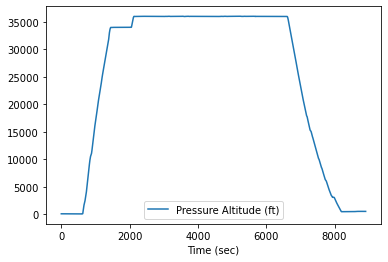

In [55]:
res_dat.plot.line(x='Time (sec)', y='Pressure Altitude (ft)')

<AxesSubplot:xlabel='Time (sec)'>

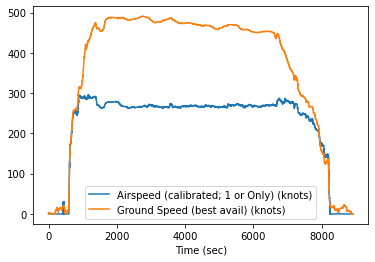

In [56]:
res_dat.plot.line(x='Time (sec)', y=['Airspeed (calibrated; 1 or Only) (knots)', 'Ground Speed (best avail) (knots)'])

<h1>More Advanced Plotting</h1>

NOTE: bokeh plotting does not currently work in VS Code, but it does show correctly in Jupyter notebook

In [57]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook

In [58]:
output_notebook()

Loading BokehJS ...

In [59]:
source = ColumnDataSource(res_dat.interpolate())

p = figure(title = 'Pressure Alt (ft) vs. Time', x_axis_label = 'Time (sec)', plot_width=950, plot_height=400)
p.line('Time (sec)', 'Pressure Altitude (ft)', line_color = 'blue', source = source)
show(p)